# Data Classification

This dataset is generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. The dataset consists of two classes; gammas (signal) and hadrons (background). There
are 12332 gamma events and 6688 hadron events. You are required to apply preprocessing techniques on this
dataset and use the preprocessed dataset to construct different classification models such as Decision Trees,
Naïve Bayes Classifier, Random Forests, AdaBoost, K-Nearest Neighbor (K-NN) and Support Vector
Machines (SVM). You are also required to tune the parameters of these models, compare the performance of
the learned models before and after preprocessing and compare the performance of models with each other.

## Importing dataset

In [1]:
import pandas as pd
import numpy as np
from time import time

data = pd.read_csv("dataset/magic04.data",
                  names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
                           "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"])

In [2]:
display(data.head(10))
print(len(data))

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


19020


## Data balancing
We can notice that there is an imbalance between the number of rows existent in 'g' and the number of rows existent in 'h'.
This problem must be solved by removing random samples from data where class is 'g' until both number of rows are equal.

In [3]:
data_g = data[data['class'] == 'g']
data_h = data[data['class'] == 'h']

print (len(data_g))
print (len(data_h))

12332
6688


In [4]:
data_g = data_g.sample(n=len(data_h))

data = pd.concat([data_g, data_h], ignore_index=True)

In [6]:
print(len(data[data['class'] == 'g']))

6688


## Visualization
Using describe method to check each attribute statistics, we can observe different ranges of values for each attribue. Therefore, normalization should be used to prevent features with large domain of values to dominate other features.

In [7]:
import matplotlib.pyplot as plt
display(data.describe())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.260836,23.698595,2.841548,0.379614,0.214959,-7.203546,7.387873,0.349263,31.491950,194.875838
std,47.038755,20.943337,0.477324,0.185325,0.112541,65.469857,56.422424,23.259910,27.032611,76.523942
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.670300,11.693425,2.494200,0.232900,0.126775,-23.861250,-14.936650,-10.935350,7.275975,142.057050
50%,38.663450,17.138050,2.752600,0.355800,0.197450,2.885500,14.497950,0.706600,23.479100,192.866500
75%,76.009700,26.289150,3.119125,0.506825,0.288000,23.805625,34.510300,11.252350,52.890475,242.441625
max,334.177000,256.382000,5.323300,0.893000,0.643000,575.240700,238.321000,179.851000,90.000000,495.561000


By using the correlation matrix, that there is high correlation among fLength, fWidth, and fSize features. Another slight correlation between fDist feature and the first 3 features. 

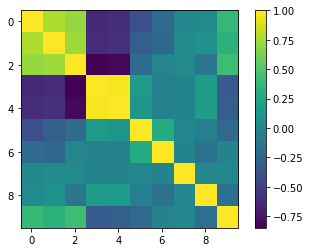

In [8]:
plt.imshow(data.corr())
plt.colorbar()

Box plots can assert our previous claim of features have different ranges of values which may affect the learning process. 

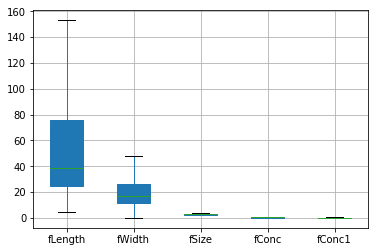

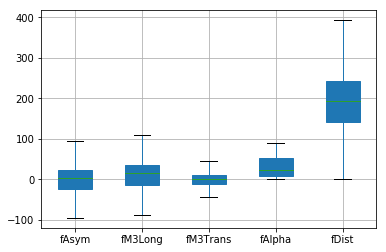

In [9]:
columns = data.columns
box_plots_1 = data.boxplot(column = ['fLength', 'fWidth','fSize','fConc', 'fConc1'], patch_artist = True, showfliers=False)
plt.figure()
box_plots_2 = data.boxplot(column = ['fAsym','fM3Long','fM3Trans', 'fAlpha', 'fDist'], patch_artist = True, showfliers=False)

## Preprocessing
As a result of our conclusions above, it is obvious now that we need to perform 2 important preprocessing steps, features normalization and features selection.
We are going to use z-normalization to normalize the data. We are not going use min-max since there are some alot of outliers in each feature. 
We will also apply PCA to reduce the correlated, unnecessary features in our dataset. 

We first normalize the data using L2 Norm, we use Z-score normalization.

In [11]:
from sklearn.preprocessing import normalize

X = data.drop(columns=['class'])
Y = pd.DataFrame(data['class'], columns=['class'])
X = pd.DataFrame(normalize(X), columns=X.columns)

data_norm = pd.concat([X, Y], axis=1)

data_norm.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0.247350,0.061871,0.011812,0.000845,0.000501,0.211877,0.227675,0.027397,0.004909,0.915067,g
1,0.335547,0.308300,0.035320,0.002433,0.001300,0.207229,0.076424,-0.228134,0.539680,0.631681,g
2,0.226525,0.090560,0.008681,0.000414,0.000215,-0.366666,0.103166,0.073526,0.004228,0.888763,g
3,0.311248,0.099865,0.012521,0.000579,0.000306,0.215388,0.331985,-0.071522,0.011250,0.855071,g
4,0.202091,0.110648,0.016118,0.002101,0.001138,0.228396,0.153716,0.088794,0.144489,0.917658,g
5,0.239334,0.051951,0.014617,0.002362,0.001614,0.080048,0.185718,-0.021984,0.077515,0.944673,g
6,0.113230,0.056469,0.011368,0.002937,0.001676,-0.112341,-0.101249,-0.055949,0.030801,0.978212,g
7,0.172902,0.104400,0.019836,0.004342,0.002411,-0.205675,-0.122159,-0.086258,0.039869,0.944739,g
8,0.196607,0.045592,0.010200,0.001693,0.000856,0.054225,0.119092,-0.031436,0.016489,0.969936,g
9,0.333121,0.091996,0.014505,0.001808,0.001021,0.105151,0.208461,0.074981,0.065870,0.903260,g


We apply PCA to the normalized data with number of components = 5, we choose 5 based on our visualization results
that show that the number of features can be reduced to 5 uncorrelated unique features.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(data_norm.loc[:, data_norm.columns != 'class'])
columns = ['pca_%i' % i for i in range(5)]
X_pca = pd.DataFrame(pca.transform(data_norm.loc[:, data_norm.columns != 'class']),
                         columns=columns, index=data_norm.index)

data_proc = pd.concat([X_pca, Y], axis=1)
display(data_proc.describe())


,pca_0,pca_1,pca_2,pca_3,pca_4
count,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04
mean,-8.499315e-18,-3.824692e-17,-1.779544e-17,-1.593622e-17,-4.316058e-19
std,2.414170e-01,1.915896e-01,1.713429e-01,1.491502e-01,8.377241e-02
min,-4.887379e-01,-2.779743e-01,-4.158323e-01,-4.627462e-01,-4.355954e-01
25%,-1.648228e-01,-1.373259e-01,-1.185146e-01,-9.736965e-02,-5.669858e-02
50%,-4.435430e-02,-4.578463e-02,-3.085270e-02,-4.676845e-03,1.379971e-03
75%,1.134313e-01,7.868478e-02,9.212340e-02,8.066759e-02,5.584991e-02
max,1.048329e+00,9.899469e-01,8.401563e-01,8.764813e-01,4.810616e-01


## Data Split
We need to randomly split the data to 70% training set and 30% testing set. We do this by first separating between class column (y) from features (x), and finally use sklearn. We use two versions, one for the unpreprocessed data and one for the preprocessed one.

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.3)
train_proc_df, test_proc_df = train_test_split(data_proc, test_size=0.3)

In [15]:
print(len(train_df))
print(len(test_df))

9363
4013


## Classification

In [29]:
def split_features(train_df, test_df):
    X_train = train_df.drop('class', axis=1)
    y_train = train_df['class']

    X_test = test_df.drop('class', axis=1)
    y_test = test_df['class']
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_features(train_df, test_df)
X_proc_train, y_proc_train, X_proc_test, y_proc_test = split_features(train_proc_df, test_proc_df)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def model_scores(y_pred, y_test):
    print("Precision Score : " + str(precision_score(y_test, y_pred, average='macro')))
    print("Recall Score : " + str(recall_score(y_test, y_pred, average='macro')))
    print("F Score : " + str(f1_score(y_test, y_pred, average="macro")))
    print("Confusion matrix : " + str(confusion_matrix(y_test, y_pred)))

#### 1. AdaBoost Classifier
We can see from the following results that the AdaBoostClassifier model achieves a maximum accuracy result of **82.63%** at number of estimators = 1000, using default base estimator as DecisionTreeClassifier(max_depth=1) *on . It can be noticed that the increase of the number of estimators results in a better accuracy, but takes a longer time to fit and predict.

In [17]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

for n in n_estimators:
    start_time = time()
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at n_estimators = ", n, " time = ", time() - start_time)

0.7699975080986793  at n_estimators =  10  time =  0.23298239707946777
0.8203339147769748  at n_estimators =  120  time =  2.7992496490478516
0.8208322950411163  at n_estimators =  230  time =  5.558085918426514
0.8240717667580364  at n_estimators =  340  time =  8.814775943756104
0.819087964116621  at n_estimators =  450  time =  13.28333330154419
0.8220782457014703  at n_estimators =  560  time =  18.301065921783447
0.8230750062297533  at n_estimators =  670  time =  21.133208990097046
0.8218290555693994  at n_estimators =  780  time =  35.6477267742157
0.8210814851731871  at n_estimators =  890  time =  29.04766845703125
0.8208322950411163  at n_estimators =  1000  time =  28.00920557975769


Using processed data (after normalization and feature reduction).

In [18]:
for n in n_estimators:
    start_time = time()
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_proc_train, y_proc_train)
    y_pred = model.predict(X_proc_test)
    print(accuracy_score(y_pred, y_proc_test), " at n_estimators = ", n, " time = ", time() - start_time)

0.6902566658360328  at n_estimators =  10  time =  0.300262451171875
0.7076999750809868  at n_estimators =  120  time =  2.4625580310821533
0.7079491652130575  at n_estimators =  230  time =  4.472189426422119
0.7072015948168453  at n_estimators =  340  time =  7.2161760330200195
0.706454024420633  at n_estimators =  450  time =  8.430338382720947
0.7039621230999252  at n_estimators =  560  time =  12.976925373077393
0.7072015948168453  at n_estimators =  670  time =  14.420040369033813
0.7081983553451283  at n_estimators =  780  time =  15.408960819244385
0.7076999750809868  at n_estimators =  890  time =  16.96372699737549
0.7081983553451283  at n_estimators =  1000  time =  18.296377182006836


We can increase the max depth of the decision tree classifier acting as a base estimator for the adaboost algorithm, we notice that the accuracy has increased to **84.77%** at n_estimators=890, but the time taken to fit the model is significantly increasing too.


In [19]:
from sklearn.tree import DecisionTreeClassifier

n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

for n in n_estimators:
    start_time = time()
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at n_estimators = ", n, " time = ", time() - start_time)

0.8240717667580364  at n_estimators =  10  time =  0.7072975635528564
0.8128582108148518  at n_estimators =  120  time =  8.391402244567871
0.8146025417393471  at n_estimators =  230  time =  16.007941961288452
0.8268128582108148  at n_estimators =  340  time =  22.87144660949707
0.8283079990032395  at n_estimators =  450  time =  30.063548803329468
0.8347869424370795  at n_estimators =  560  time =  38.66458034515381
0.8425118365312734  at n_estimators =  670  time =  48.35356950759888
0.8372788437577872  at n_estimators =  780  time =  53.80435252189636
0.8402691253426364  at n_estimators =  890  time =  62.19586515426636
0.845003737851981  at n_estimators =  1000  time =  81.35519528388977


#### 2. K-NN classifier
We can see from the following results that the best accuracy of **76.7%** is achieved at k = 24. Which is less than the accuracy we achieved using **AdaBoost (84.77%)**, but it is noticed that the time taken to fit the model and predict is way less than that of AdaBoost (0.17s vs 57s).

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k_s = [int(x) for x in np.linspace(start=5, stop=40, num=10)]

for k in k_s:
    start_time = time()
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at k = ", k, " time = ", time() - start_time)

0.7645153251931224  at k =  5  time =  0.5589761734008789
0.7607774732120608  at k =  8  time =  0.1688859462738037
0.7647645153251931  at k =  12  time =  0.14991092681884766
0.7642661350610516  at k =  16  time =  0.16152620315551758
0.76052828307999  at k =  20  time =  0.22388243675231934
0.7617742337403439  at k =  24  time =  0.3950991630554199
0.7600299028158485  at k =  28  time =  0.2769935131072998
0.7607774732120608  at k =  32  time =  0.21049904823303223
0.7587839521554947  at k =  36  time =  0.23679757118225098
0.75728881136307  at k =  40  time =  0.6356022357940674


In [22]:
from sklearn.neighbors import KNeighborsClassifier

k_s = [int(x) for x in np.linspace(start=5, stop=40, num=10)]

for k in k_s:
    start_time = time()
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_proc_train, y_proc_train)
    y_pred = model.predict(X_proc_test)
    print(accuracy_score(y_pred, y_proc_test), " at k = ", k, " time = ", time() - start_time)

0.7199102915524546  at k =  5  time =  0.0769658088684082
0.7136805382506852  at k =  8  time =  0.06995916366577148
0.7209070520807376  at k =  12  time =  0.07504987716674805
0.7204086718165961  at k =  16  time =  0.09013223648071289
0.72489409419387  at k =  20  time =  0.0945577621459961
0.7268876152504361  at k =  24  time =  0.09641265869140625
0.7288811363070022  at k =  28  time =  0.12529206275939941
0.7296287067032146  at k =  32  time =  0.11247134208679199
0.732369798155993  at k =  36  time =  0.14387774467468262
0.7326189882880638  at k =  40  time =  0.12660765647888184


#### 3. Random Forests
The random forests is trained the exact same way AdaBoost is trained earlier. It can be seen that random forests achieves maximum accuracy of **86.51%** at n_estimators = 670, and takes 18.8s to fit and predict data, which is better than AdaBoost in terms of both accuracy (82.6%) and time (21s).

In [26]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

for n in n_estimators:
    start_time = time()
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at n_estimators = ", n, " time = ", time() - start_time)

0.8360328930974333  at n_estimators =  10  time =  0.31835484504699707
0.852728631946175  at n_estimators =  120  time =  3.703810691833496
0.8519810615499627  at n_estimators =  230  time =  6.618767023086548
0.8539745826065288  at n_estimators =  340  time =  13.050545454025269
0.853725392474458  at n_estimators =  450  time =  14.580679655075073
0.8547221530027411  at n_estimators =  560  time =  22.304248332977295
0.8529778220782457  at n_estimators =  670  time =  31.998010396957397
0.8544729628706703  at n_estimators =  780  time =  40.683979749679565
0.8552205332668826  at n_estimators =  890  time =  31.256914377212524
0.8544729628706703  at n_estimators =  1000  time =  35.4376962184906


In [24]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

for n in n_estimators:
    start_time = time()
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_proc_train, y_proc_train)
    y_pred = model.predict(X_proc_test)
    print(accuracy_score(y_pred, y_proc_test), " at n_estimators = ", n, " time = ", time() - start_time)

0.7174183902317468  at n_estimators =  10  time =  0.2803490161895752
0.7463244455519561  at n_estimators =  120  time =  3.616668462753296
0.7493147271368054  at n_estimators =  230  time =  8.564835548400879
0.74433092449539  at n_estimators =  340  time =  9.31927752494812
0.7465736356840269  at n_estimators =  450  time =  10.936365127563477
0.7445801146274608  at n_estimators =  560  time =  13.834892272949219
0.7453276850236731  at n_estimators =  670  time =  18.890822410583496
0.7440817343633193  at n_estimators =  780  time =  18.567312479019165
0.7455768751557438  at n_estimators =  890  time =  23.345545053482056
0.7455768751557438  at n_estimators =  1000  time =  28.84114146232605


#### 4. SVM Classifier
The Linear SVM classifier performed badly with accuracy less than **57%**. Which means that the data was not linearly separable. The wide range of C regularization values did not introduce big contribution to the accuracy, which endorses our claim.  

In [31]:
from sklearn import svm
C = [1, 5, 10, 100, 1000]

for c in C:
    start_time = time()
    model = svm.SVC(C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at C = ", c, " time = ", time() - start_time)
    model_scores(y_test, y_pred)

/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5033640667829554  at C =  1  time =  8.371149778366089
Precision Score : 0.5060828483498141
Recall Score : 0.5608074888883371
F Score : 0.3614191538907127
Confusion matrix : [[1956 1954]
 [  39   64]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5026164963867431  at C =  5  time =  10.108948945999146
Precision Score : 0.5053166861653638
Recall Score : 0.5473496411917214
F Score : 0.36295143256530704
Confusion matrix : [[1948 1949]
 [  47   69]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5026164963867431  at C =  10  time =  10.118077039718628
Precision Score : 0.5053166861653638
Recall Score : 0.5473496411917214
F Score : 0.36295143256530704
Confusion matrix : [[1948 1949]
 [  47   69]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5026164963867431  at C =  100  time =  11.120841264724731
Precision Score : 0.5053166861653638
Recall Score : 0.5473496411917214
F Score : 0.36295143256530704
Confusion matrix : [[1948 1949]
 [  47   69]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5026164963867431  at C =  1000  time =  10.667268991470337
Precision Score : 0.5053166861653638
Recall Score : 0.5473496411917214
F Score : 0.36295143256530704
Confusion matrix : [[1948 1949]
 [  47   69]]


In [ ]:
from sklearn import svm
C = [1, 5, 10, 100, 1000]

for c in C:
    start_time = time()
    model = svm.SVC(C=c)
    model.fit(X_proc_train, y_proc_train)
    y_pred = model.predict(X_proc_test)
    print(accuracy_score(y_pred, y_proc_test), " at C = ", c, " time = ", time() - start_time)
    model_scores(y_proc_test, y_pred)

/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7136805382506852  at C =  1  time =  4.080479860305786
Precision Score : 0.7136897727346113
Recall Score : 0.71486667049618
F Score : 0.7132905719436908
Confusion matrix : [[1506  649]
 [ 500 1358]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7224021928731622  at C =  5  time =  3.9426538944244385
Precision Score : 0.7224031691671373
Recall Score : 0.722416427832268
F Score : 0.7223983143508199
Confusion matrix : [[1457  565]
 [ 549 1442]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7221530027410914  at C =  10  time =  5.313428163528442
Precision Score : 0.7221515572862875
Recall Score : 0.722182020077059
F Score : 0.7221430645943424
Confusion matrix : [[1437  546]
 [ 569 1461]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7253924744580115  at C =  100  time =  10.932708740234375
Precision Score : 0.7253868687907379
Recall Score : 0.7258462979721503
F Score : 0.7252511945908173
Confusion matrix : [[1410  506]
 [ 596 1501]]


/usr/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 5. Naive Bayes Classifier
Bayes Classifier behaved relatively better than SVMs but not as good as AdaBoost. The accuracy was **65%** which indicates that the features are dependent on each other which violates the assumption made by the classifier.

In [ ]:
from sklearn.naive_bayes import GaussianNB
start_time = time()
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test), " using Naive Bayes Classifier ", " time = ", time() - start_time)
model_scores(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
start_time = time()
model = GaussianNB()
model.fit(X_proc_train, y_proc_train)
y_pred = model.predict(X_proc_test)
print(accuracy_score(y_pred, y_proc_test), " using Naive Bayes Classifier ", " time = ", time() - start_time)
model_scores(y_proc_test, y_pred)

#### 6. Decision Tree Classifier
The Decision tree performed much better than previous classifiers. The inaccuracy could be justified by claiming that the decision tree only involves one feature during partitioning at each node. Accuracy was **79%**

In [ ]:
from sklearn import tree
start_time = time()
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test), " using Decision Tree Classifier ", " time = ", time() - start_time)
model_scores(y_test, y_pred)